In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import os
import copy
import skimage.io as io
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 20.0)

In [2]:
# change dataDir to where you save the files
dataDir='/home/sp/repos/data/dishwasher/CocoFormat/'
annFile = os.path.join(dataDir, 'new_labels.json')
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.09s)
creating index...
index created!


In [3]:
def showBoxes(coco, anns):
    """ Display the bounding boxes. """
    np.random.seed(12)
    ax = plt.gca(); ax.set_autoscale_on(True)
    polygons = []; color = []
    for ann in anns:
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        [bbox_x, bbox_y, bbox_w, bbox_h] = ann['bbox']
        poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
        np_poly = np.array(poly).reshape((4,2))
        polygons.append(Polygon(np_poly))
        color.append(c)
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=3)
    ax.add_collection(p)
    
def showPoints(coco, anns):
    """ Display the point annotation """
    np.random.seed(12)
    ax = plt.gca(); ax.set_autoscale_on(True)
    polygons = []; color = []
    for ann in anns:
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        if 'point' in ann and type(ann['point']) == list:
            kp = np.array(ann['point'])
            plt.plot(kp[0], kp[1],'o',markersize=12, markerfacecolor=c, markeredgecolor='k',markeredgewidth=2)
            

def showScribbles(coco, anns, I):
    """ Display the scribble annotation """
    np.random.seed(12)
    ax = plt.gca(); ax.set_autoscale_on(True)
    for ann in anns:
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        if 'scribble' in ann and type(ann['scribble']) == list:
            scb = np.array(ann['scribble']) -1 
            for i in [-1, 0, 1]:
                for j in [-1, 0, 1]:
                    I[scb[1]+i, scb[0]+j] = np.uint8(np.array(c) * 255)
    return I

In [4]:
I = io.imread(dataDir + 'data/bowl_im_black_bg_2021-09-0718:52:04.793645_white.png')

In [5]:
np.random.seed(12)
# get all images containing given categories, select one at random
catIds = 1
image_id = 1
img = I


# load and display instance annotations
annIds = 1
anns = coco.loadAnns(annIds)

# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(dataDir + 'data/bowl_im_black_bg_2021-09-0718:52:04.793645_white.png')

assert len(anns) > 0, "try another image"

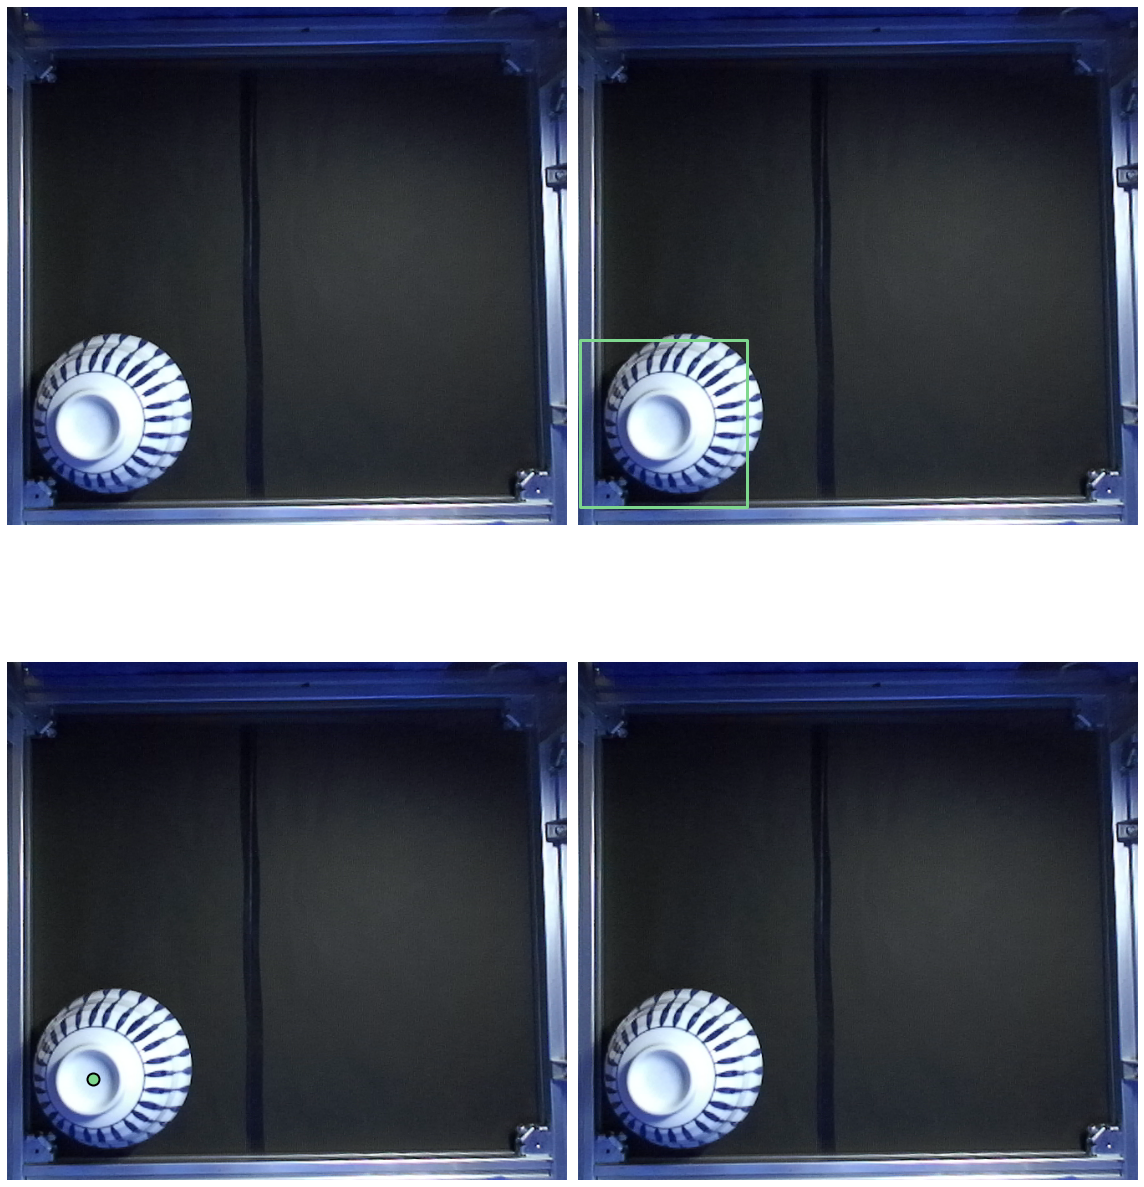

In [6]:
# images
plt.subplot(2,2,1)
plt.imshow(I); plt.axis('off')

# strong labels: boxes
plt.subplot(2,2,2)
plt.imshow(I); plt.axis('off')
showBoxes(coco, anns)

# partial labels: points
plt.subplot(2,2,3)
plt.imshow(I); plt.axis('off')
showPoints(coco, anns)

# partial labels: scribbles
plt.subplot(2,2,4)
I1 = showScribbles(coco, anns, copy.deepcopy(I))
plt.imshow(I1); plt.axis('off')

plt.tight_layout()